<a href="https://colab.research.google.com/github/ysc4/CCDATSCL_EXERCISES_COM222/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [212]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [213]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [214]:
# put your answer here

cols = df.columns
cols

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [215]:
# put your answer here

shape_info = df.shape
shape_info

(8807, 12)

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [216]:
# put your answer here

missing_counts = df.isna().sum()
missing_counts

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [217]:
# put your answer here

df_clean = df.dropna(subset=['duration'])
df_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [219]:
# put your answer here

df_num = df.select_dtypes(include=['number'])
df_num

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021
...,...
8802,2007
8803,2018
8804,2009
8805,2006


In [221]:
df_clean['duration_min'] = df_clean['duration'].str.extract(r'(\d+)\s*min', expand=False)
df_clean['duration_season'] = df_clean['duration'].str.extract(r'(\d+)\s*Seasons?', expand=False)

df_clean['duration_min'] = pd.to_numeric(df_clean['duration_min'], errors='coerce')
df_clean['duration_season'] = pd.to_numeric(df_clean['duration_season'], errors='coerce')

df_clean['duration_season_min'] = df_clean['duration_season'] * 450

df_clean['duration'] = df_clean['duration_min'].combine_first(df_clean['duration_season_min'])

df_clean = df_clean.drop(columns=['duration_min', 'duration_season', 'duration_season_min'])

df_clean


/tmp/ipython-input-1984730438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_min'] = df_clean['duration'].str.extract(r'(\d+)\s*min', expand=False)
/tmp/ipython-input-1984730438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['duration_season'] = df_clean['duration'].str.extract(r'(\d+)\s*Seasons?', expand=False)
/tmp/ipython-input-1984730438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,900.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,450.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,450.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,900.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,900.0,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88.0,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [222]:
# put your answer here

dur = df_clean['duration']
dur

,duration
0,90.0
1,900.0
2,450.0
3,450.0
4,900.0
...,...
8802,158.0
8803,900.0
8804,88.0
8805,88.0


Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [223]:
# put your answer here
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clean['dur_minmax'] = scaler.fit_transform(df_clean[['duration']])

df_clean['dur_minmax']


,dur_minmax
0,0.011377
1,0.117301
2,0.058454
3,0.058454
4,0.117301
...,...
8802,0.020269
8803,0.117301
8804,0.011115
8805,0.011115


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [224]:
# put your answer here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean['dur_zscore'] = scaler.fit_transform(df_clean[['duration']])

df_clean['dur_zscore']

,dur_zscore
0,-0.435570
1,1.162906
2,0.274863
3,0.274863
4,1.162906
...,...
8802,-0.301377
8803,1.162906
8804,-0.439517
8805,-0.439517


## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [225]:
# put your answer here

df_clean['duration_equal_width_bin'] = pd.cut(df_clean['dur_minmax'], bins=4)
df_clean['duration_equal_width_bin']

,duration_equal_width_bin
0,"(-0.001, 0.25]"
1,"(-0.001, 0.25]"
2,"(-0.001, 0.25]"
3,"(-0.001, 0.25]"
4,"(-0.001, 0.25]"
...,...
8802,"(-0.001, 0.25]"
8803,"(-0.001, 0.25]"
8804,"(-0.001, 0.25]"
8805,"(-0.001, 0.25]"


Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

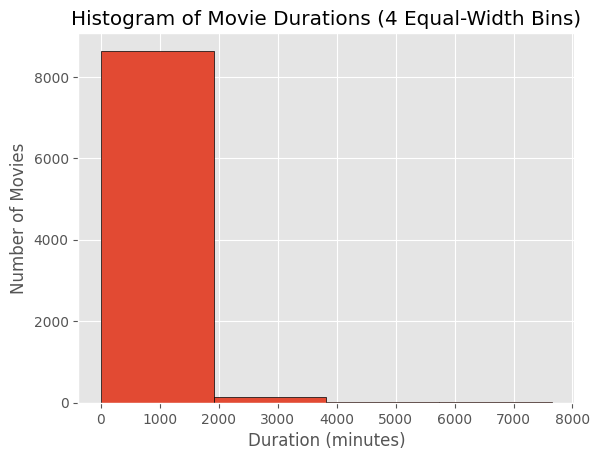

  Bin Interval (mins)  Number of Movies
0      (-0.001, 0.25]              8640
1         (0.25, 0.5]               138
2         (0.5, 0.75]                20
3         (0.75, 1.0]                 6


In [226]:
# put your answer here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bin_counts = df_clean['duration_equal_width_bin'].value_counts().sort_index()

plt.style.use('ggplot')

plt.hist(df_clean['duration'], bins=4, edgecolor='black')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Histogram of Movie Durations (4 Equal-Width Bins)')
plt.show()

bin_table = pd.DataFrame({
    'Bin Interval (mins)': bin_counts.index.astype(str),
    'Number of Movies': bin_counts.values
})

print(bin_table)


In [227]:
print('Bin 1: Contains the majority of titles—mostly movies or single-episode content with standard durations.')
print('Bin 2: Mostly composed of TV shows with around 1 season, resulting in moderately higher total durations.')
print('Bin 3: Primarily includes TV series with at least 2 seasons, leading to longer total durations.')
print('Bin 4: Contains extreme-duration titles—likely long-running shows with multiple seasons or possible outliers.')

Bin 1: Contains the majority of titles—mostly movies or single-episode content with standard durations.
Bin 2: Mostly composed of TV shows with around 1 season, resulting in moderately higher total durations.
Bin 3: Primarily includes TV series with at least 2 seasons, leading to longer total durations.
Bin 4: Contains extreme-duration titles—likely long-running shows with multiple seasons or possible outliers.


Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [228]:
# put your answer here

df_clean['duration_equal_freq_bin'] = pd.qcut(df_clean['dur_zscore'], q=4)
df_clean['duration_equal_freq_bin']

,duration_equal_freq_bin
0,"(-0.608, -0.432]"
1,"(0.275, 14.484]"
2,"(-0.392, 0.275]"
3,"(-0.392, 0.275]"
4,"(0.275, 14.484]"
...,...
8802,"(-0.392, 0.275]"
8803,"(0.275, 14.484]"
8804,"(-0.608, -0.432]"
8805,"(-0.608, -0.432]"


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

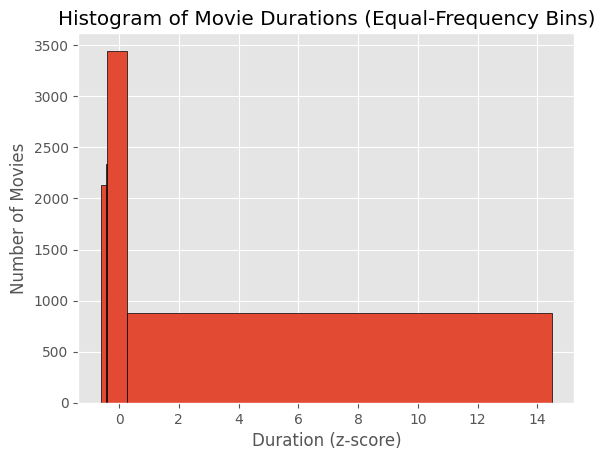

  Bin Interval (mins)  Number of Movies
0    (-0.608, -0.432]              2263
1    (-0.432, -0.392]              2212
2     (-0.392, 0.275]              3446
3     (0.275, 14.484]               883


In [229]:
# put your answer here

import matplotlib.pyplot as plt

bin_counts = df_clean['duration_equal_freq_bin'].value_counts().sort_index()

bin_edges = [interval.left for interval in df_clean['duration_equal_freq_bin'].cat.categories]
bin_edges.append(df_clean['duration_equal_freq_bin'].cat.categories[-1].right)

plt.style.use('ggplot')

plt.hist(df_clean['dur_zscore'], bins=bin_edges, edgecolor='black')
plt.xlabel('Duration (z-score)')
plt.ylabel('Number of Movies')
plt.title('Histogram of Movie Durations (Equal-Frequency Bins)')
plt.show()

bin_table = pd.DataFrame({
    'Bin Interval (mins)': bin_counts.index.astype(str),
    'Number of Movies': bin_counts.values
})

print(bin_table)

In [230]:
print('Bin 1: Contains the shortest 25% of movies based on duration')
print('Bin 2: Contains the next 25% of movies based on duration')
print('Bin 3: Contains the next 25% of movies based on duration')
print('Bin 4: Contains the longest 25% of movies based on duration')

Bin 1: Contains the shortest 25% of movies based on duration
Bin 2: Contains the next 25% of movies based on duration
Bin 3: Contains the next 25% of movies based on duration
Bin 4: Contains the longest 25% of movies based on duration


## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [231]:
# put your answer here

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df_clean[['release_year', 'duration']]
y = df_clean['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_raw = accuracy_score(y_test, y_pred)
acc_raw


1.0

Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [232]:
# put your answer here

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df_clean[['release_year', 'dur_minmax']]
y = df_clean['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_scaled_minmax = accuracy_score(y_test, y_pred)
acc_scaled_minmax

0.9943214082907439

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df_clean[['release_year', 'dur_zscore']]
y = df_clean['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_scaled_zscore = accuracy_score(y_test, y_pred)
acc_scaled_zscore

0.9948892674616695

Did scaling improve accuracy? Explain why.


In [234]:
# put your answer here

print("Accuracy without scaling:", acc_raw)
print("Accuracy with MinMax scaling:", acc_scaled_minmax)
print("Accuracy with Z-score standardization:", acc_scaled_zscore)

Accuracy without scaling: 1.0
Accuracy with MinMax scaling: 0.9943214082907439
Accuracy with Z-score standardization: 0.9948892674616695


The scaling did not improve the accuracy because it introduced additional noise into the dataset. We had to convert TV shows with “seasons” into a format comparable to movies measured in minutes. As a result, many TV shows ended up with durations exceeding 450 minutes, and some even surpassed a thousand minutes due to multiple seasons. These large converted values heavily influenced the model and affected its distance calculations, leading to a slight drop in accuracy after scaling.

Furthermore, because the dataset did not provide the actual duration of each episode, we had to rely on estimated averages from external sources. These approximations added further uncertainty, which may have contributed to the reduction in accuracy.